In [508]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels as sm

%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import scipy. stats as stats
from sklearn.metrics import mean_squared_error
import datetime
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import r2_score


from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso




In [469]:
shooting= pd.read_csv(r"c:\MY FILE\MMAI-5000N AI\group project\Group Project Data-SFD Data-Toronto Police.csv")

In [470]:
shooting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5707 entries, 0 to 5706
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  5707 non-null   float64
 1   Y                  5707 non-null   float64
 2   OBJECTID           5707 non-null   int64  
 3   EVENT_UNIQUE_ID    5707 non-null   object 
 4   OCC_DATE           5707 non-null   object 
 5   OCC_YEAR           5707 non-null   int64  
 6   OCC_MONTH          5707 non-null   object 
 7   OCC_DOW            5707 non-null   object 
 8   OCC_DOY            5707 non-null   int64  
 9   OCC_DAY            5707 non-null   int64  
 10  OCC_HOUR           5707 non-null   int64  
 11  OCC_TIME_RANGE     5707 non-null   object 
 12  DIVISION           5707 non-null   object 
 13  DEATH              5707 non-null   int64  
 14  INJURIES           5707 non-null   int64  
 15  HOOD_158           5707 non-null   object 
 16  NEIGHBOURHOOD_158  5707 

In [471]:
shooting.drop(['X', 'Y'], axis=1, inplace=True)


In [472]:
shooting['OCC_DATE'] = pd.to_datetime(shooting['OCC_DATE'])

In [473]:
shooting['date'] = shooting['OCC_DATE'].dt.date

In [474]:
shooting.head()

,OBJECTID,EVENT_UNIQUE_ID,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DOY,OCC_DAY,OCC_HOUR,OCC_TIME_RANGE,DIVISION,DEATH,INJURIES,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84,date
0,1,GO-2004397105,2004-05-15 04:00:00+00:00,2004,May,Saturday,136,15,1,Night,D41,0,0,142,Woburn North,137,Woburn (137),-79.234955,43.781528,2004-05-15
1,2,GO-2004600109,2004-07-26 04:00:00+00:00,2004,July,Monday,208,26,23,Evening,D23,0,0,1,West Humber-Clairville,1,West Humber-Clairville (1),-79.618218,43.733547,2004-07-26
2,3,GO-2004311851,2004-05-14 04:00:00+00:00,2004,May,Friday,135,14,16,Afternoon,D31,1,1,24,Black Creek,24,Black Creek (24),-79.518759,43.769157,2004-05-14
3,4,GO-2004736004,2004-12-19 05:00:00+00:00,2004,December,Sunday,354,19,0,Night,D51,1,0,168,Downtown Yonge East,75,Church-Yonge Corridor (75),-79.378870,43.660665,2004-12-19
4,5,GO-2004303455,2004-04-12 04:00:00+00:00,2004,April,Monday,103,12,22,Evening,D42,0,0,146,Malvern East,132,Malvern (132),-79.212435,43.812075,2004-04-12


<Axes: xlabel='date', ylabel='Count'>

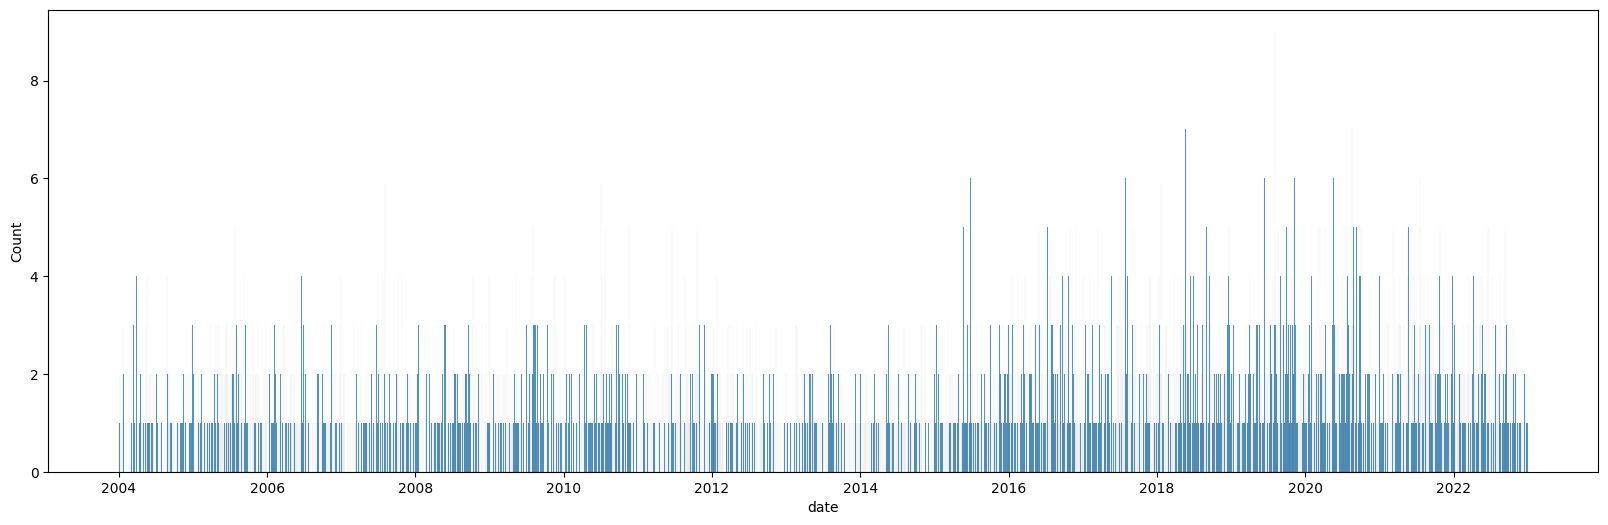

In [475]:
plt.figure(figsize =(20,6))
sns.histplot(shooting['date'])

<Axes: >

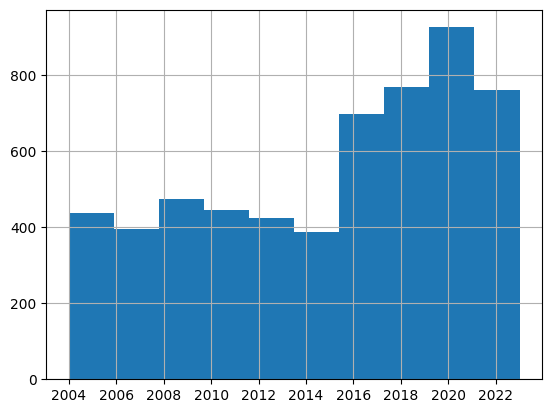

In [476]:
shooting['date'].hist()

In [477]:
grouped_shooting = shooting. groupby('date').size().reset_index(name='incidents')

In [478]:
grouped_shooting.head()

,date,incidents
0,2004-01-01,1
1,2004-01-03,1
2,2004-01-04,1
3,2004-01-05,1
4,2004-01-06,2


In [479]:
grouped_shooting['date'] = pd.to_datetime(grouped_shooting['date'])

<Axes: xlabel='incidents', ylabel='Count'>

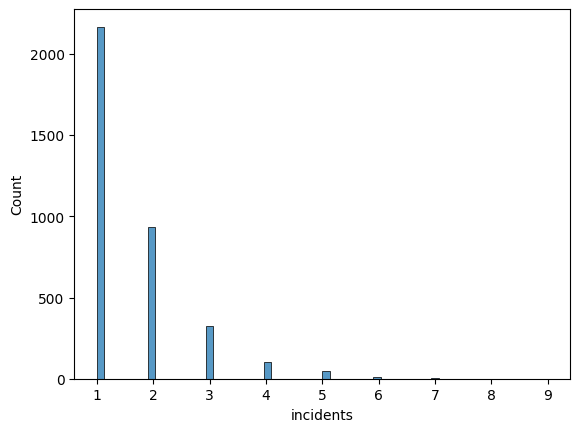

In [480]:
sns.histplot(grouped_shooting['incidents'])

In [481]:
weather = pd.read_csv(r"C:\MY FILE\MMAI-5000N AI\group project\toronto 2004-01-01 to 2022-12-31.csv")

In [482]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6940 entries, 0 to 6939
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              6940 non-null   object 
 1   datetime          6940 non-null   object 
 2   tempmax           6940 non-null   float64
 3   tempmin           6940 non-null   float64
 4   temp              6940 non-null   float64
 5   feelslikemax      6940 non-null   float64
 6   feelslikemin      6940 non-null   float64
 7   feelslike         6940 non-null   float64
 8   dew               6940 non-null   float64
 9   humidity          6940 non-null   float64
 10  precip            6940 non-null   float64
 11  precipprob        6940 non-null   int64  
 12  precipcover       6940 non-null   float64
 13  preciptype        4260 non-null   object 
 14  snow              6940 non-null   float64
 15  snowdepth         6940 non-null   float64
 16  windgust          5217 non-null   float64


In [483]:
weather.rename(columns={'datetime': 'date'}, inplace=True)

In [484]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6940 entries, 0 to 6939
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              6940 non-null   object 
 1   date              6940 non-null   object 
 2   tempmax           6940 non-null   float64
 3   tempmin           6940 non-null   float64
 4   temp              6940 non-null   float64
 5   feelslikemax      6940 non-null   float64
 6   feelslikemin      6940 non-null   float64
 7   feelslike         6940 non-null   float64
 8   dew               6940 non-null   float64
 9   humidity          6940 non-null   float64
 10  precip            6940 non-null   float64
 11  precipprob        6940 non-null   int64  
 12  precipcover       6940 non-null   float64
 13  preciptype        4260 non-null   object 
 14  snow              6940 non-null   float64
 15  snowdepth         6940 non-null   float64
 16  windgust          5217 non-null   float64


In [485]:
weather['date'] = pd.to_datetime(weather['date'])

In [486]:
merged = pd.merge(grouped_shooting, weather, on ='date')

In [487]:
merged.head()

,date,incidents,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,2004-01-01,1,toronto,3.0,0.1,2.2,1.7,-5.0,-1.3,-3.7,...,NaN,NaN,NaN,2004-01-01T07:51:12,2004-01-01T16:50:51,0.31,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"71624099999,71432099999,71265099999"
1,2004-01-03,1,toronto,12.3,5.1,8.4,12.3,1.5,6.3,5.1,...,NaN,NaN,NaN,2004-01-03T07:51:17,2004-01-03T16:52:40,0.37,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"71624099999,71432099999,71265099999"
2,2004-01-04,1,toronto,6.0,-0.4,1.6,2.3,-7.1,-3.3,-4.9,...,NaN,NaN,NaN,2004-01-04T07:51:16,2004-01-04T16:53:37,0.40,Partially cloudy,Partly cloudy throughout the day.,snow,"71624099999,71432099999,71265099999"
3,2004-01-05,1,toronto,-1.0,-4.9,-3.5,-6.6,-11.8,-9.3,-6.9,...,NaN,NaN,NaN,2004-01-05T07:51:12,2004-01-05T16:54:35,0.44,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,snow,"71624099999,71432099999,71265099999"
4,2004-01-06,2,toronto,-2.9,-10.0,-6.4,-9.6,-21.8,-15.8,-10.9,...,NaN,NaN,NaN,2004-01-06T07:51:06,2004-01-06T16:55:35,0.47,"Snow, Partially cloudy",Partly cloudy throughout the day with afternoo...,snow,"71624099999,71432099999,71265099999"


<Axes: xlabel='temp', ylabel='incidents'>

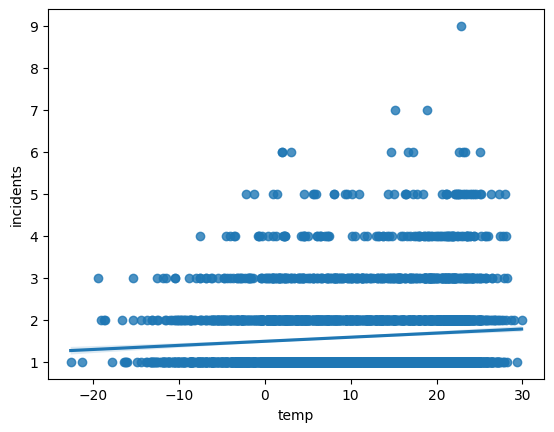

In [489]:
sns.regplot(x='temp', y='incidents', data = merged)

In [492]:
merged = merged.drop(['name','stations', 'sunrise', 'sunset'], axis=1)

In [494]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3579 entries, 0 to 3578
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              3579 non-null   datetime64[ns]
 1   incidents         3579 non-null   int64         
 2   tempmax           3579 non-null   float64       
 3   tempmin           3579 non-null   float64       
 4   temp              3579 non-null   float64       
 5   feelslikemax      3579 non-null   float64       
 6   feelslikemin      3579 non-null   float64       
 7   feelslike         3579 non-null   float64       
 8   dew               3579 non-null   float64       
 9   humidity          3579 non-null   float64       
 10  precip            3579 non-null   float64       
 11  precipprob        3579 non-null   int64         
 12  precipcover       3579 non-null   float64       
 13  preciptype        2130 non-null   object        
 14  snow              3579 n

In [495]:
numerical_col =['date', 'tempmax', 'tempmin', 'temp', 'feelslikemax','feelslikemin','feelslike','dew','humidity','windgust' , ' windspeed', 'winddir', 'sealevelpressure','snow','snowdepth','cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk','moonphase']

In [496]:
missing_value_counts = merged.isna().sum()
print(missing_value_counts)


date                   0
incidents              0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype          1449
snow                   0
snowdepth              0
windgust             895
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility             0
solarradiation       963
solarenergy          963
uvindex              963
severerisk          3361
moonphase              0
conditions             0
description            0
icon                   0
dtype: int64


In [497]:
merged.drop('preciptype', axis = 1, inplace =True)

merged.drop('windgust', axis = 1, inplace =True)

In [498]:

merged.drop('solarradiation', axis = 1, inplace =True)
merged.drop('solarenergy', axis = 1, inplace =True)
merged.drop('uvindex', axis = 1, inplace =True)
merged.drop('severerisk', axis = 1, inplace =True)

In [500]:


numerical_col = ['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'windspeed', 'winddir', 'sealevelpressure', 'snow', 'snowdepth', 'cloudcover', 'visibility', 'moonphase']

correlations = merged[numerical_col].corrwith(merged['incidents']).sort_values(ascending=False)
print(correlations)


feelslikemin        0.107305
temp                0.107258
feelslike           0.107242
tempmin             0.106762
feelslikemax        0.106503
tempmax             0.106113
dew                 0.086499
visibility          0.069849
sealevelpressure    0.022919
moonphase          -0.014848
winddir            -0.017595
snow               -0.046159
cloudcover         -0.048749
humidity           -0.055953
windspeed          -0.072370
snowdepth          -0.076898
dtype: float64


In [518]:
model_ols = ols('incidents ~ feelslikemin + temp + feelslike + feelslikemax + tempmax + dew + visibility + sealevelpressure ', data = merged)
result_model_ols = model_ols.fit()
print(result_model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:              incidents   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     8.196
Date:                Thu, 20 Jul 2023   Prob (F-statistic):           4.77e-11
Time:                        17:03:35   Log-Likelihood:                -4711.3
No. Observations:                3579   AIC:                             9441.
Df Residuals:                    3570   BIC:                             9496.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -3.0785      2.377  

In [502]:
categorical_features = ['conditions', 'icon']
numerical_features = ['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'windspeed', 'winddir', 'sealevelpressure', 'snow', 'snowdepth', 'cloudcover', 'visibility', 'moonphase']
target = 'incidents'

In [503]:
# split date in train/test
X_train, X_test, y_train, y_test = train_test_split(merged[categorical_features + numerical_features], merged[target], test_size =0.3, random_state =1234)
#define transformers
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps =[('scaler', StandardScaler())])
#building processor
preprocessor = ColumnTransformer(transformers=[('cat',cat_transformer,categorical_features),('num', num_transformer, numerical_features)])

In [504]:
merged

,date,incidents,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,visibility,moonphase,conditions,description,icon
0,2004-01-01,1,3.0,0.1,2.2,1.7,-5.0,-1.3,-3.7,65.1,...,0.2,29.7,270.4,1025.8,74.8,14.3,0.31,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day
1,2004-01-03,1,12.3,5.1,8.4,12.3,1.5,6.3,5.1,84.3,...,0.2,29.1,247.6,1008.6,57.7,8.7,0.37,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain
2,2004-01-04,1,6.0,-0.4,1.6,2.3,-7.1,-3.3,-4.9,61.8,...,0.6,36.7,356.0,1017.7,49.1,14.2,0.40,Partially cloudy,Partly cloudy throughout the day.,snow
3,2004-01-05,1,-1.0,-4.9,-3.5,-6.6,-11.8,-9.3,-6.9,77.6,...,2.1,34.7,5.4,1013.6,88.5,9.2,0.44,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,snow
4,2004-01-06,2,-2.9,-10.0,-6.4,-9.6,-21.8,-15.8,-10.9,70.6,...,2.1,53.6,261.6,1018.2,61.8,13.0,0.47,"Snow, Partially cloudy",Partly cloudy throughout the day with afternoo...,snow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3574,2022-12-26,1,-4.6,-7.7,-6.0,-11.2,-17.0,-14.0,-11.4,65.8,...,1.8,41.8,256.0,1019.2,66.0,14.9,0.11,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day
3575,2022-12-27,1,-0.3,-5.7,-3.3,-6.4,-13.1,-10.0,-8.8,66.0,...,2.6,34.5,253.8,1021.5,76.7,14.9,0.15,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day
3576,2022-12-29,1,8.7,4.1,6.3,7.1,1.8,4.2,1.4,70.8,...,2.1,18.7,228.6,1017.7,54.7,14.9,0.25,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day
3577,2022-12-30,1,10.7,8.9,9.9,10.7,7.1,9.2,6.9,81.5,...,1.6,21.8,279.8,1016.7,98.4,12.7,0.25,"Rain, Overcast",Cloudy skies throughout the day with rain.,rain


In [505]:
linear_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

linear_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['conditions', 'icon']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['tempmax', 'tempmin', 'temp',
                                                   'feelslikemax',
                                                   'feelslikemin', 'feelslike',
                                                   'dew', 'humidity',
                                                   'windspeed', 'winddir',
                                                   'sealevelpressure', 'snow',
                                                   'snowdepth', 'cloudcover',
                                                   'visibility',
                                                   'moonphase'])])),
                ('regressor', LinearRegression())])

In [506]:
pred_ln = linear_regression.predict(X_test)
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(pred_ln, y_test))
MSE_LR = np.sqrt(mean_squared_error(pred_ln, y_test))
print('MSE_LR', MSE_LR)
r2_score_ln = r2_score(y_test, pred_ln)
print("R2 Score: ", r2_score_ln)

MSE_LR 1377642456.4664211
R2 Score:  -2.551715644783003e+18


In [509]:
ridge_regression = Pipeline(steps = [
    ('preprocessor', preprocessor), 
    ('regressor', Ridge(alpha =3.0))
])


ridge_regression.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['conditions', 'icon']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['tempmax', 'tempmin', 'temp',
                                                   'feelslikemax',
                                                   'feelslikemin', 'feelslike',
                                                   'dew', 'humidity',
                                                   'windspeed', 'winddir',
                                                   'sealevelpressure', 'snow',
                                                   'snowdepth', 'cloudcover',
                                                   'visibility',
                                                   'moonphase'])])),
                ('regressor', Ridge(alpha=3.0))])

In [512]:
pred_ridge = ridge_regression.predict(X_test)
np.sqrt(mean_squared_error(pred_ridge, y_test))
MSE_RG = np.sqrt(mean_squared_error(pred_ridge, y_test))
print(MSE_RG)
r2_score_rg = r2_score(y_test, pred_ridge)
print("R2 Score: ", r2_score_rg)

0.855445835291181
R2 Score:  0.01611515306974487


In [513]:
lasso_regression = Pipeline(steps =[
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha = 1.0))
])

lasso_regression.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['conditions', 'icon']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['tempmax', 'tempmin', 'temp',
                                                   'feelslikemax',
                                                   'feelslikemin', 'feelslike',
                                                   'dew', 'humidity',
                                                   'windspeed', 'winddir',
                                                   'sealevelpressure', 'snow',
                                                   'snowdepth', 'cloudcover',
                                                   'visibility',
                                                   'moonphase'])])),
                ('regressor', Lasso())])

In [514]:
lasso_pred = lasso_regression.predict(X_test)
np.sqrt(mean_squared_error(lasso_pred, y_test))
MSE_LS = np.sqrt(mean_squared_error(lasso_pred, y_test))
print(MSE_LS)
r2_score_la = r2_score(y_test, pred_ridge)
print("R2 Score: ", r2_score_rg)

0.8624232819031603
R2 Score:  0.01611515306974487


In [515]:
elasticnet_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=1.0, l1_ratio = 0.8))
])

elasticnet_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['conditions', 'icon']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['tempmax', 'tempmin', 'temp',
                                                   'feelslikemax',
                                                   'feelslikemin', 'feelslike',
                                                   'dew', 'humidity',
                                                   'windspeed', 'winddir',
                                                   'sealevelpressure', 'snow',
                                                   'snowdepth', 'cloudcover',
                                                   'visibility',
                                                   'moonphase'])])),
                ('regressor', ElasticNet(l1_ratio=0.8))])

In [516]:
elasticnet_pred = elasticnet_regression.predict(X_test)
np.sqrt(mean_squared_error(elasticnet_pred, y_test))
MSE_EL = np.sqrt(mean_squared_error(elasticnet_pred, y_test))
print(MSE_EL)
r2_score_el = r2_score(y_test, pred_ridge)
print("R2 Score: ", r2_score_rg)

0.8624232819031603
R2 Score:  0.01611515306974487
